# Link to the dataset 
https://www.kaggle.com/datasets/ziya07/tourism-resource-management-dataset

# The imports

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Lecture and cleaning

In [7]:
print(df.head(7))

             timestamp location_id  visitor_count  resource_usage_rate  \
0  2024-12-01 00:00:00     LOC_003            808             0.907638   
1  2024-12-01 01:00:00     LOC_001            948             0.974266   
2  2024-12-01 02:00:00     LOC_003            292             0.321912   
3  2024-12-01 03:00:00     LOC_003            592             0.811889   
4  2024-12-01 04:00:00     LOC_001             89             0.936667   
5  2024-12-01 05:00:00     LOC_001            278             0.900152   
6  2024-12-01 06:00:00     LOC_003            597             0.975164   

   temperature  air_quality_index  noise_level  season  peak_hour_flag  \
0    19.368864                127    51.506727  summer               0   
1    17.404945                 37    55.901717  autumn               0   
2    16.366819                113    68.533024  winter               1   
3    20.266316                 52    85.301039  autumn               1   
4    15.922471                145    

In [4]:
df = pd.read_csv('tourism_resource_dataset.csv')

In [ ]:
df.describe()

In [ ]:
df.head()

In [ ]:
# Convert 'timestamp' to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Visualisation

# 1. Scatter plot of visitor count vs. resource usage rate, colored by season

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='visitor_count', y='resource_usage_rate', hue='season', data=df, alpha=0.7)
plt.title('Visitor Count vs. Resource Usage Rate by Season')
plt.xlabel('Visitor Count')
plt.ylabel('Resource Usage Rate')
plt.legend(title='Season')
plt.tight_layout()
plt.show()

# 2. Box plots of visitor satisfaction across different seasons

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='visitor_satisfaction', data=df)
plt.title('Visitor Satisfaction Across Seasons')
plt.xlabel('Season')
plt.ylabel('Visitor Satisfaction')
plt.tight_layout()
plt.show()

# 3. Bar charts of resource allocation distribution across locations

In [ ]:
allocation_counts = df.groupby(['location_id', 'resource_allocation']).size().unstack().fillna(0)
allocation_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Resource Allocation Distribution Across Locations')
plt.xlabel('Location ID')
plt.ylabel('Count')
plt.legend(title='Resource Allocation')
plt.tight_layout()
plt.show()

# 4. Heatmap of correlation between numerical variables

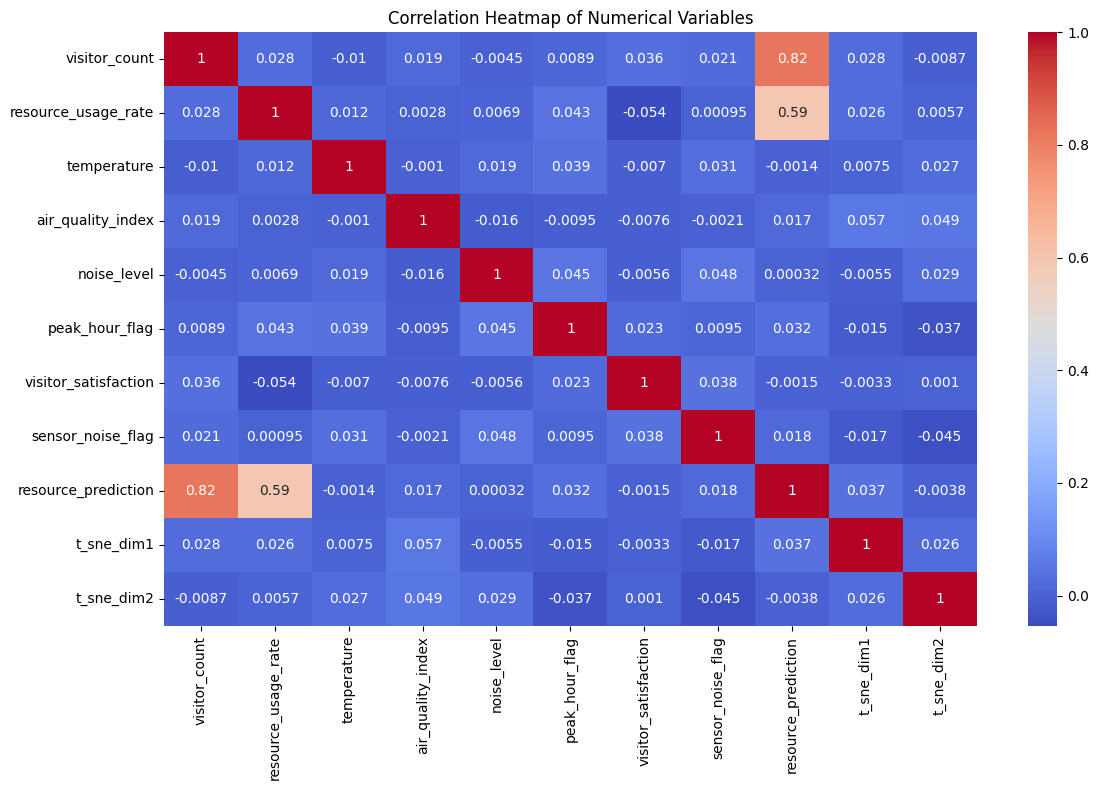

In [ ]:
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

# 5. Scatter plot of t-SNE dimensions colored by resource allocation

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='t_sne_dim1', y='t_sne_dim2', hue='resource_allocation', data=df, alpha=0.7)
plt.title('t-SNE Dimensions Colored by Resource Allocation')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Resource Allocation')
plt.tight_layout()
plt.show()

# 6. Line plot of average temperature, air quality index, and noise level over time

In [ ]:
df['hour'] = df['timestamp'].dt.hour
hourly_avg = df.groupby('hour')[['temperature', 'air_quality_index', 'noise_level']].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='temperature', data=hourly_avg, label='Temperature')
sns.lineplot(x='hour', y='air_quality_index', data=hourly_avg, label='Air Quality Index')
sns.lineplot(x='hour', y='noise_level', data=hourly_avg, label='Noise Level')
plt.title('Hourly Average Temperature, Air Quality, and Noise Level')
plt.xlabel('Hour of Day')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

# 7. Scatter plot of temperature vs. visitor satisfaction

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='visitor_satisfaction', data=df, alpha=0.7)
plt.title('Temperature vs. Visitor Satisfaction')
plt.xlabel('Temperature')
plt.ylabel('Visitor Satisfaction')
plt.tight_layout()
plt.show()

# Testing models and saving the best one with LE and scaler

In [ ]:
# Extract hour and day of week from timestamp
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek

# Encode categorical variables
categorical_cols = ['location_id', 'season', 'peak_hour_flag', 'sensor_noise_flag', 'resource_allocation']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoder for later use

# Define features and target variable
features = ['hour', 'dayofweek', 'visitor_count', 'temperature', 'air_quality_index',
            'noise_level', 'visitor_satisfaction', 't_sne_dim1', 't_sne_dim2',
            'location_id', 'season', 'peak_hour_flag', 'sensor_noise_flag',
            'resource_allocation']

target = 'resource_usage_rate'

X = df[features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train multiple models

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
print('Linear Regression Metrics:')
print('RMSE:', np.sqrt(mean_squared_error(y_test, lr_pred)))
print('MAE:', mean_absolute_error(y_test, lr_pred))
print('R2 Score:', r2_score(y_test, lr_pred))
print('-----------------------------')

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)
print('Decision Tree Metrics:')
print('RMSE:', np.sqrt(mean_squared_error(y_test, dt_pred)))
print('MAE:', mean_absolute_error(y_test, dt_pred))
print('R2 Score:', r2_score(y_test, dt_pred))
print('-----------------------------')

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
print('Random Forest Metrics:')
print('RMSE:', np.sqrt(mean_squared_error(y_test, rf_pred)))
print('MAE:', mean_absolute_error(y_test, rf_pred))
print('R2 Score:', r2_score(y_test, rf_pred))
print('-----------------------------')

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)
gb_pred = gb_model.predict(X_test_scaled)
print('Gradient Boosting Metrics:')
print('RMSE:', np.sqrt(mean_squared_error(y_test, gb_pred)))
print('MAE:', mean_absolute_error(y_test, gb_pred))
print('R2 Score:', r2_score(y_test, gb_pred))
print('-----------------------------')

# Save models and scalers


joblib.dump(rf_model, 'rf_model.pkl')

joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

print('Models and preprocessing objects saved.')